# Train Model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_excel("../artifacts/supermarket_inventory_data2.xlsx")

# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['LastSoldDate'] = pd.to_datetime(df['LastSoldDate'])
df['LastRestockDate'] = pd.to_datetime(df['LastRestockDate'])
df['NextRestockDate'] = pd.to_datetime(df['NextRestockDate'])

# Set reference date (e.g., the first date in your dataset or a fixed date like 2020-01-01)
reference_date = pd.to_datetime('2020-01-01')

# Convert dates to numeric (days since the reference date)
df['DaysSinceDate'] = (df['Date'] - reference_date).dt.days
df['DaysSinceLastSoldDate'] = (df['LastSoldDate'] - reference_date).dt.days
df['DaysSinceLastRestockDate'] = (df['LastRestockDate'] - reference_date).dt.days
df['DaysUntilNextRestockDate'] = (df['NextRestockDate'] - reference_date).dt.days

# Drop non-numeric and unnecessary columns
df = df.drop(columns=['ProductID', 'ProductName', 'Category', 'Supplier', 'DeliveryStatus', 
                      'Date', 'LastSoldDate', 'LastRestockDate', 'NextRestockDate'])

# Ensure all remaining columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values after conversion
df = df.dropna()

# Define features and target variable
X = df.drop(columns=['UnitsSold'])  # Use all columns except the target variable
y = df['UnitsSold']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Train Random Forest Regressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

print("Models trained successfully!")


Models trained successfully!


In [2]:
X

,UnitPrice,StockQuantity,StockValue,ReorderLevel,ReorderQuantity,SalesValue,DeliveryTimeDays,DaysSinceDate,DaysSinceLastSoldDate,DaysSinceLastRestockDate,DaysUntilNextRestockDate
0,89.94,55,4946.70,34,47,359.76,9,1529,1569.0,1622,1646
1,9.82,189,1855.98,12,22,49.10,3,1532,1624.0,1634,1641
2,48.66,130,6325.80,29,24,924.54,7,1483,1580.0,1600,1609
3,54.87,96,5267.52,27,20,3566.55,3,1547,1612.0,1515,1518
4,49.69,109,5416.21,9,66,546.59,10,1481,1521.0,1606,1624
...,...,...,...,...,...,...,...,...,...,...,...
9995,91.16,50,4558.00,14,25,273.48,4,1550,1510.0,1546,1567
9996,10.14,14,141.96,39,71,10.14,9,1482,1464.0,1496,1510
9997,58.40,79,4613.60,28,42,1518.40,4,1483,1467.0,1488,1495
9998,25.55,160,4088.00,10,66,383.25,9,1605,1521.0,1533,1559


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # For square root calculation

def training_scores(y_act, y_pred):
    mae = round(mean_absolute_error(y_act, y_pred), 3)
    mse = round(mean_squared_error(y_act, y_pred), 3)
    rmse = round(np.sqrt(mse), 3)  # Take square root of MSE to get RMSE
    r2 = round(r2_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tMAE = {mae}\n\tMSE = {mse}\n\tRMSE = {rmse}\n\tR² = {r2}')
    
def validation_scores(y_act, y_pred):
    mae = round(mean_absolute_error(y_act, y_pred), 3)
    mse = round(mean_squared_error(y_act, y_pred), 3)
    rmse = round(np.sqrt(mse), 3)  # Take square root of MSE to get RMSE
    r2 = round(r2_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tMAE = {mae}\n\tMSE = {mse}\n\tRMSE = {rmse}\n\tR² = {r2}')


## Results of Random Forest

In [5]:
y_train_pred1 = rf.predict(X_train)

y_test_pred1 = rf.predict(X_test)

training_scores(y_train, y_train_pred1)

validation_scores(y_test, y_test_pred1)

Training Scores:
	MAE = 21.789
	MSE = 811.615
	RMSE = 28.489
	R² = 0.581
Testing Scores:
	MAE = 21.599
	MSE = 784.093
	RMSE = 28.002
	R² = 0.571


## Results of Linear Regretion

In [6]:
y_train_pred2 = lr.predict(X_train)

y_test_pred2 = lr.predict(X_test)

training_scores(y_train, y_train_pred2)

validation_scores(y_test, y_test_pred2)

Training Scores:
	MAE = 10.746
	MSE = 277.925
	RMSE = 16.671
	R² = 0.856
Testing Scores:
	MAE = 10.503
	MSE = 267.068
	RMSE = 16.342
	R² = 0.854


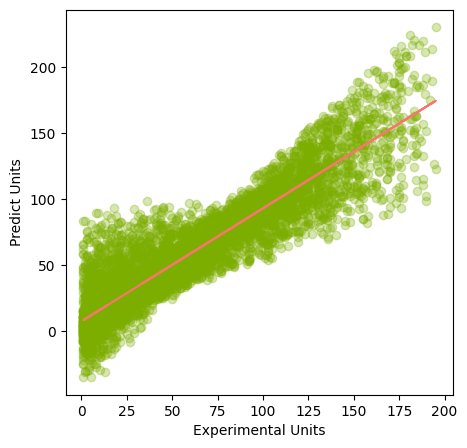

In [16]:
import matplotlib.pyplot as plt
import numpy as np

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00",alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Units')
plt.xlabel('Experimental Units')
plt.show()

In [18]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)